Nama: Muhammad Ashlah Afifi

NIM: 1103210216

Kelas: TK-45-G44

Step 1: Import necessary libraries

In [1]:


import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Step 2: Load and preprocess the data

In [2]:
# Load the dataset
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Print dataset shapes
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


57026/57026 [==============================] - 0s 0us/step
Training data shape: (404, 13)
Test data shape: (102, 13)


Step 3: Build the neural network model

In [3]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # Output layer with 1 neuron for regression
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()


Step 4: Train the model

Epoch 1/100
21/21 [==============================] - 1s 14ms/step - loss: 491.1046 - mae: 20.2381 - val_loss: 475.6546 - val_mae: 19.9688
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 347.1687 - mae: 16.5954 - val_loss: 315.2783 - val_mae: 15.7489
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 200.8186 - mae: 11.9816 - val_loss: 171.8066 - val_mae: 10.5812
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 102.0206 - mae: 7.8917 - val_loss: 87.4048 - val_mae: 7.0524
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 61.1601 - mae: 5.7837 - val_loss: 61.9994 - val_mae: 5.8384
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 45.4425 - mae: 4.7995 - val_loss: 44.2284 - val_mae: 4.8668
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 35.5216 - mae: 4.0739 - val_loss: 32.8924 - val_mae: 4.2647
Epoch 8/100
21/21 [==============================] - 0s

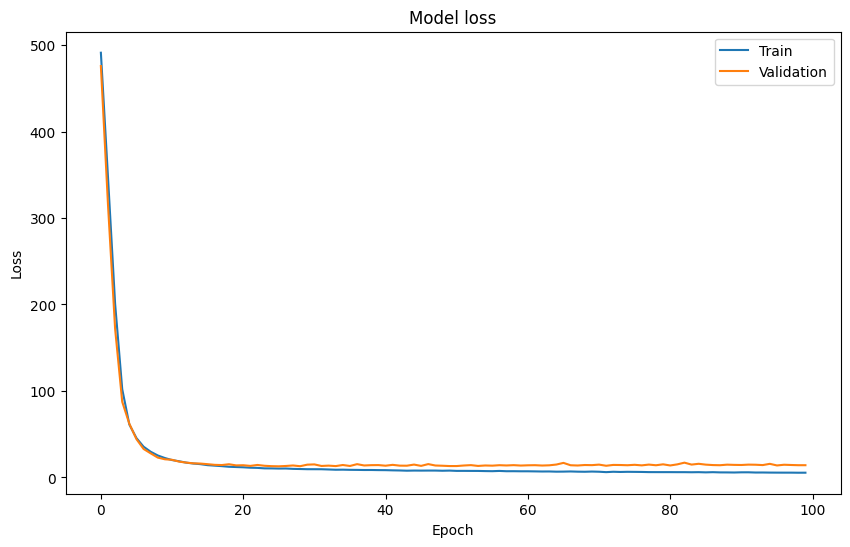

In [4]:
history = model.fit(train_data, train_targets,
                    epochs=100, batch_size=16,
                    validation_split=0.2, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Step 5: Evaluate the model

In [5]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(f"Test MSE: {test_mse_score}")
print(f"Test MAE: {test_mae_score}")


4/4 [==============================] - 0s 5ms/step - loss: 21.9926 - mae: 2.9166
Test MSE: 21.99257469177246
Test MAE: 2.916591167449951
